In [448]:
import math
import numpy as np
from scipy.optimize import fsolve
from math import exp
import matplotlib.pyplot as plt
import random as random
import pandas as pd

###  Conditions for placing the lead glass blocks
Before doing the actual calculation, let me describe the setup!
Let (h,k) be the point of the ceter of the detector. We start with the center block which is vertically upwards.
Just place it at the center -> (0,0), the detector center is k units right below the lead glass block.

Now we put the first tilted lead glass block. To do so, we constraint a bit the position of the first lead glass block. To locate the position of the block, we only need to know the coordinate of the lower left and right corners of the block -> (x1,y1) and (x2,y2) and here are the constraints:

0. Shift the origin of the coordinate system to the lower right corner of the lead glass block and the coordinate
of the center after shifting is (h',k')

1. The lower left corner must lie on the the right hand side edge of the previous block. So x1 can be expressed
by: y1 = m*x1  (m is the slope of the right edge of the previous block). 

2. y2 must be zero because it always lie on the horizontal line

3. Draw a perpendicular bisector from the center of the rectangle that cuts the straight line formed by (x1,y1) and (x2,y2) and this line should pass through the center point (h',k') (product of their slope is -1)

4. The distance between (x1,y1) and (x2,y2) should be a constant (i.e. the width of the lead glass block)

With these condition you can easily calculate the position of the blocks! 

The first tilted block is easier to calculate because x1 must be 0! 


In [648]:
def equations_first(vars):
    #print(h,k)
    x2,y1 = vars
    eq1 = np.sqrt((x2)**2 + y1**2)-2*a
    eq2 = ((x2)/2-h)*(x2)+(y1/2-k)*(-y1) +1 
    return [eq1,eq2]

def equation_(vars):
    #print(h,k)
    x1,x2,y1 = vars
    eq1 = np.sqrt((x2-x1)**2 + y1**2)-2*a
    eq2 = y1-m*x1
    eq3 = ((((y1/2-k))/((x1+x2)/2 - h))*(-y1/(x2-x1)))+1
    return [eq1,eq2,eq3]


def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.
    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    
    return qx, qy

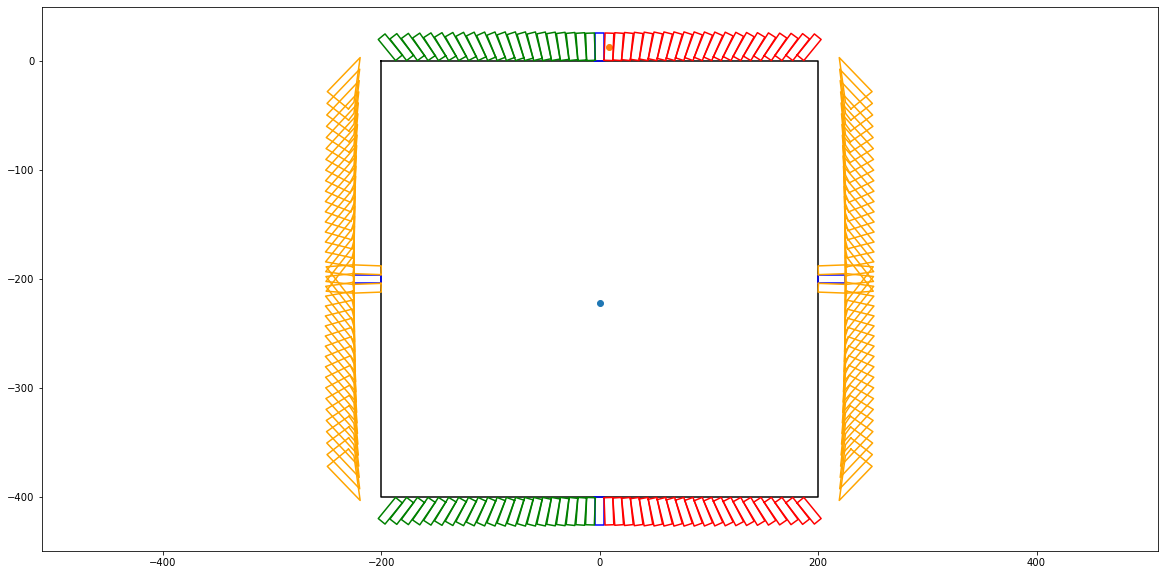

In [1459]:
plt.figure(figsize=(20,10))


lead_glass_posx =[]

a = 4
b = 12.5
h = -4
k = -222
plt.scatter(0,k)

#### drawing the square box in the figure 
rectangleX0 = [-200,200,200,-200,-200]
rectangleY0 = [0,0,-400,-400,0]
plt.plot(rectangleX0, rectangleY0, '-',color = "black")


#### 1. drawing the center lead glass block
rectangleX0 = np.array([-a,-a,a,a,-a])
rectangleY0 = np.array([0,2*b,2*b,0,0])
plt.plot(rectangleX0, rectangleY0, '-',color='blue')
plt.plot(rectangleX0, -rectangleY0-400, '-',color='blue')

x1_left,y1_left = (rotate([0,-200],[-a,0],math.pi/2))
x2_left,y2_left = (rotate([0,-200],[-a,2*b],math.pi/2))
x3_left,y3_left = (rotate([0,-200],[a,2*b],math.pi/2))
x4_left,y4_left = (rotate([0,-200],[a,0],math.pi/2))

rectangleX = np.array([x1_left,x2_left,x3_left,x4_left,x1_left])
rectangleY = np.array([y1_left,y2_left,y3_left,y4_left,y1_left])
plt.plot(rectangleX, rectangleY, '-',color='blue')
plt.plot(-rectangleX, rectangleY, '-',color='blue')

lead_glass_posx.append([0,b,0])

####### start placing the other lead glass blocks 
############# 2. for the first tilted box
x2,y1 = fsolve(equations_first,(1,1))
x1 =0; y2=0
h = h-x2
theta = math.asin(y1/(2*a))
x1 = x1+a
x2=x2+a
x3 = x1+2*b*math.sin(theta)
x4 = x2+2*b*math.sin(theta)
y3 = y1+2*b*math.cos(theta)
y4 = y2+2*b*math.cos(theta)

rectangleX = np.array([x1,x3,x4,x2,x1])
rectangleY = np.array([y1,y3,y4,y2,y1])
plt.plot(rectangleX, rectangleY, '-',color='red')
plt.plot(-rectangleX, rectangleY, '-',color='green')
plt.plot(rectangleX, -rectangleY-400, '-',color='red')
plt.plot(-rectangleX, -rectangleY-400, '-',color='green')

x1_left,y1_left = (rotate([0,-200],[x1,y1],math.pi/2))
x2_left,y2_left = (rotate([0,-200],[x2,y2],math.pi/2))
x3_left,y3_left = (rotate([0,-200],[x3,y3],math.pi/2))
x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))
rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])
rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
plt.plot(rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, -rectangleY-400, '-',color='orange')
plt.plot(rectangleX, -rectangleY-400, '-',color='orange')
  

x_shift = x2
m = (y4-y2)/(x4-x2)

xc,yc = (x1 + x4)/2, (y4+y1)/2
plt.scatter(xc,yc)
lead_glass_posx.append([xc,yc,theta/math.pi*180])

##########################
#for the second block
for i in range(20):
    x1,x2,y1 = fsolve(equation_,(1,1.1,1))
    y2=0
    h = h-x2
    theta = math.asin(y1/(2*a))
    x1 = x1+x_shift; x2=x2+x_shift;
    x3 = x1+2*b*math.sin(theta)
    x4 = x2+2*b*math.sin(theta)
    y3 = y1+2*b*math.cos(theta)
    y4 = y2+2*b*math.cos(theta)

    rectangleX = np.array([x1,x3,x4,x2,x1])
    rectangleY = np.array([y1,y3,y4,y2,y1])
    
    plt.plot(rectangleX, rectangleY, '-',color='red')
    plt.plot(-rectangleX, rectangleY, '-',color='green')
    plt.plot(rectangleX, -rectangleY-400, '-',color='red')
    plt.plot(-rectangleX, -rectangleY-400, '-',color='green')
    
    ##### plot the two sides
    x1_left,y1_left = (rotate([0,-225],[x1,y1],math.pi/2))
    x2_left,y2_left = (rotate([0,-225],[x2,y2],math.pi/2))
    x3_left,y3_left = (rotate([0,-225],[x3,y3],math.pi/2))
    x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))

    x1_right,y1_right = (rotate([0,-200],[x1,y1],math.radians(math.pi/2)))
    x2_right,y2_right = (rotate([0,-200],[x2,y2],math.radians(math.pi/2)))
    x3_right,y3_right = (rotate([0,-200],[x3,y3],math.radians(math.pi/2)))
    x4_right,y4_right = (rotate([0,-200],[x4,y4],math.radians(math.pi/2)))

    rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])
    rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
    plt.plot(rectangleX, rectangleY, '-',color='orange')
    plt.plot(-rectangleX, rectangleY, '-',color='orange')
    plt.plot(-rectangleX, -rectangleY-400, '-',color='orange')
    plt.plot(rectangleX, -rectangleY-400, '-',color='orange')
    
    x_shift = x2
    m = (y4-y2)/(x4-x2)

    xc,yc = (x1 + x4)/2, (y4+y1)/2
    lead_glass_posx.append([xc,yc,theta/math.pi*180])

plt.axis('equal')
plt.show()

df_x = pd.DataFrame(lead_glass_posx)
df_x.to_csv("./lead_glass_position/lead_glass_posx.csv",index=False,header=False)

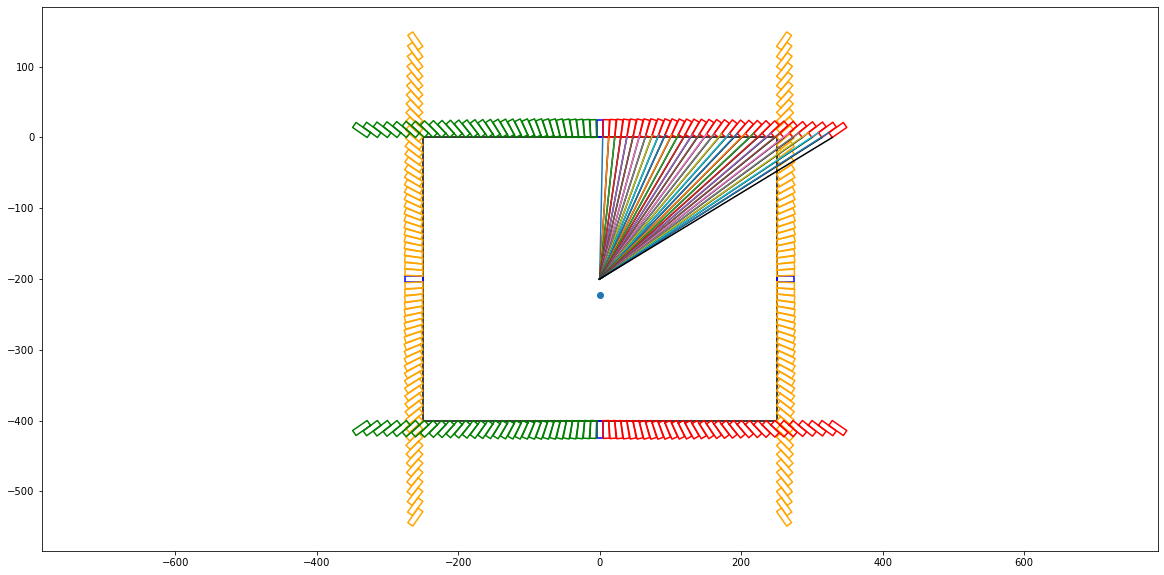

In [1460]:
plt.figure(figsize=(20,10))

plt.scatter(0,k)
lead_glass_posz = []
lead_glass_corner = []
lead_glass_xy = []

offset = 0.25 #0.25/10 #cm

a = 4 + offset
b = 12.5

h = -a
k = -222

#### drawing the square box in the figure 
rectangleX0 = [-250,250,250,-250,-250]
rectangleY0 = [0,0,-400,-400,0]
plt.plot(rectangleX0, rectangleY0, '-',color = "black")

#### 1. drawing the center lead glass block
rectangleX0 = np.array([-a,-a,a,a,-a])
rectangleY0 = np.array([0,2*b,2*b,0,0])
plt.plot(rectangleX0, rectangleY0, '-',color='blue')
plt.plot(rectangleX0, -rectangleY0-400, '-',color='blue')

rectangleX = np.array([-250,-250,-250-2*b,-250-2*b,-250])
rectangleY = np.array([-200-a,-200+a,-200+a,-200-a,-200-a])
plt.plot(rectangleX, rectangleY, '-',color='blue')
plt.plot(-rectangleX, rectangleY, '-',color='blue')

lead_glass_xy.append([-a,0,a,0,-a,2*b,a,2*b])

x1,y1 = -a,0
x2,y2 = a,0
X1 = np.array([[-a],[y1-k],[x1]])
X2 = np.array(([-a],[y2-k],[x2]))
unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle_ = np.arccos(dot_product)
lead_glass_corner.append(angle_)
lead_glass_posz.append([0,b,0])

####### start placing the other lead glass blocks 
############# 2. for the first tilted box
x2,y1 = fsolve(equations_first,(1,1))
x1 =0; y2=0
h = h-x2
theta = math.asin(y1/(2*a))
x1 = x1+a
x2=x2+a
x3 = x1+2*b*math.sin(theta)
x4 = x2+2*b*math.sin(theta)
y3 = y1+2*b*math.cos(theta)
y4 = y2+2*b*math.cos(theta)

lead_glass_xy.append([x1,y1,x2,y2,x3,y3,x4,y4])

X1 = np.array([[-a],[y1-k],[x1]])
X2 = np.array(([-a],[y2-k],[x2]))
unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle_ = np.arccos(dot_product)
lead_glass_corner.append(angle_)


rectangleX = np.array([x1,x3,x4,x2,x1])
rectangleY = np.array([y1,y3,y4,y2,y1])
plt.plot(rectangleX, rectangleY, '-',color='red')
plt.plot(-rectangleX, rectangleY, '-',color='green')
plt.plot(rectangleX, -rectangleY-400, '-',color='red')
plt.plot(-rectangleX, -rectangleY-400, '-',color='green')
plt.plot([x1,0],[y1,-200])
plt.plot([x2,0],[y2,-200],color = 'black')

x1_left,y1_left = (rotate([0,-200],[x1,y1],math.pi/2))
x2_left,y2_left = (rotate([0,-200],[x2,y2],math.pi/2))
x3_left,y3_left = (rotate([0,-200],[x3,y3],math.pi/2))
x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))
rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])-50
rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
plt.plot(rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, -rectangleY-400, '-',color='orange')
plt.plot(rectangleX, -rectangleY-400, '-',color='orange')
    

x_shift = x2
m = (y4-y2)/(x4-x2)
xc,yc = (x1 + x4)/2, (y4+y1)/2
#print(xc,yc,theta/math.pi*180)
lead_glass_posz.append([xc,yc,theta/math.pi*180])

##########################
#for the second block
for i in range(30):
    x1,x2,y1 = fsolve(equation_,(1,1.1,1))
    y2=0
    h = h-x2
    theta = math.asin(y1/(2*a))
    x1 = x1+x_shift; x2=x2+x_shift;
    x3 = x1+2*b*math.sin(theta)
    x4 = x2+2*b*math.sin(theta)
    y3 = y1+2*b*math.cos(theta)
    y4 = y2+2*b*math.cos(theta)
    
    lead_glass_xy.append([x1,y1,x2,y2,x3,y3,x4,y4])
    
    rectangleX = np.array([x1,x3,x4,x2,x1])
    rectangleY = np.array([y1,y3,y4,y2,y1])
    
    X1 = np.array([[-a],[y1-k],[x1]])
    X2 = np.array(([-a],[y2-k],[x2]))
    unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
    unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle_ = np.arccos(dot_product)
    lead_glass_corner.append(angle_)
    
    
    plt.plot(rectangleX, rectangleY, '-',color='red')
    plt.plot(-rectangleX, rectangleY, '-',color='green')
    plt.plot(rectangleX, -rectangleY-400, '-',color='red')
    plt.plot(-rectangleX, -rectangleY-400, '-',color='green')
    plt.plot([x1,0],[y1,-200])
    plt.plot([x2,0],[y2,-200],color = 'black')
    ##### plot the two sides
    x1_left,y1_left = (rotate([0,-200],[x1,y1],math.pi/2))
    x2_left,y2_left = (rotate([0,-200],[x2,y2],math.pi/2))
    x3_left,y3_left = (rotate([0,-200],[x3,y3],math.pi/2))
    x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))

    x1_right,y1_right = (rotate([0,-200],[x1,y1],math.radians(math.pi/2)))
    x2_right,y2_right = (rotate([0,-200],[x2,y2],math.radians(math.pi/2)))
    x3_right,y3_right = (rotate([0,-200],[x3,y3],math.radians(math.pi/2)))
    x4_right,y4_right = (rotate([0,-200],[x4,y4],math.radians(math.pi/2)))

    rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])-50
    rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
    plt.plot(rectangleX, rectangleY, '-',color='orange')
    plt.plot(-rectangleX, rectangleY, '-',color='orange')
    plt.plot(-rectangleX, -rectangleY-400, '-',color='orange')
    plt.plot(rectangleX, -rectangleY-400, '-',color='orange')
    
    x_shift = x2
    m = (y4-y2)/(x4-x2)
    xc,yc = (x1 + x4)/2, (y4+y1)/2
    #print(xc,yc,theta/math.pi*180)
    lead_glass_posz.append([xc,yc,theta/math.pi*180])

plt.axis('equal')
plt.show()

df_z = pd.DataFrame(lead_glass_posz)
df_z.to_csv("./lead_glass_position/lead_glass_posz.csv",index=False,header=False)


#

In [1461]:
def Rx(theta):
    return np.matrix([[ 1., 0.           , 0.           ],
                   [ 0., math.cos(theta),-math.sin(theta)],
                   [ 0., math.sin(theta), math.cos(theta)]])
 
def Ry(theta):
    return np.matrix([[ math.cos(theta), 0., math.sin(theta)],
                   [ 0.           , 1., 0.           ],
                   [-math.sin(theta), 0., math.cos(theta)]])
 
def Rz(theta):
    return np.matrix([[ math.cos(theta), -math.sin(theta), 0. ],
                   [ math.sin(theta), math.cos(theta) , 0. ],
                   [ 0.           , 0.            , 1. ]])
def dotproduct(v1, v2):
    return sum((a*b) for a, b in zip(v1, v2))

def length(v):
    return math.sqrt(dotproduct(v, v))

def angle_vec(v1, v2):
    #print(dotproduct(v1, v2) / (length(v1) * length(v2)))
    return np.arccos(dotproduct(v1, v2) / (length(v1) * length(v2)))/math.pi*180
    

In [1462]:
pos_z = []

#### drawing the square box in the figure 
rectangleX0 = [-200,200,200,-200,-200]
rectangleY0 = [0,0,-400,-400,0]

a = 4 
x1,y1,x2,y2,x3,y3,x4,y4 = [-a,0,a,0,-a,2*b,a,2*b]
xc,yc,zc = (x1+x4)/2,(y1+y4)/2,0
#print(xc,yc,zc)
#construct the bottom 4 corners and center 
X1_ = np.array([[-a],[y1-k],[x1]])
X2_ = np.array(([-a],[y2-k],[x2]))
X3_ = np.array(([a],[y1-k],[x1]))
X4_ = np.array(([a],[y2-k],[x2]))
Xc_ = np.array([[zc],[yc-k],[xc]])    
Xc_vec = np.array(Xc_).ravel()
pos_z.append([Xc_vec[0],Xc_vec[1],Xc_vec[2],0,0,0])

for i in range(25): #26 #along the z axis     len(lead_glass_posz)
    
    angle = lead_glass_corner[i]
    X1_ = Rx(angle)*X1_
    X2_ = Rx(angle)*X2_
    X3_ = Rx(angle)*X3_
    X4_ = Rx(angle)*X4_
    Xc_ = Rx(angle)*Xc_
    
    Xc_vec = np.array(Xc_).ravel()
    
    
    v1 = np.array(X1_).ravel() - np.array(X2_).ravel()
    v2 = np.array(X3_).ravel() - np.array(X2_).ravel()
    cp = np.cross(v2, v1)
    cp = cp/np.sqrt(sum(cp**2))

    cp_prime = np.array([cp[0],cp[1],cp[2]])
    cp_prime = cp_prime/np.sqrt(sum(cp_prime**2))
    #cp_prime[2] = 0 
    
    y_shift = min(X1_[1],X2_[1],X3_[1],X4_[1])
    shift_vec = np.array((-k-y_shift)*cp_prime/cp_prime[1])
    Xc_vec = np.array(Xc_).ravel()+shift_vec[0]
    X1_vec = np.array(X1_).ravel()+shift_vec[0]
    X2_vec = np.array(X2_).ravel()+shift_vec[0]
    X3_vec = np.array(X3_).ravel()+shift_vec[0]
    X4_vec = np.array(X4_).ravel()+shift_vec[0]
    
    X1_ = np.array([[X1_vec[0]],[X1_vec[1]],[X1_vec[2]]])
    X2_ = np.array(([X2_vec[0]],[X2_vec[1]],[X2_vec[2]]))
    X3_ = np.array(([X3_vec[0]],[X3_vec[1]],[X3_vec[2]]))
    X4_ = np.array(([X4_vec[0]],[X4_vec[1]],[X4_vec[2]]))
    Xc_ = np.array([[Xc_vec[0]],[Xc_vec[1]],[Xc_vec[2]]])
    
    pos_z.append([Xc_vec[0],Xc_vec[1],Xc_vec[2],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))]) # rotation in z always zero for this 
    
    #print(" == Z block Position ", [Xc_vec[0],Xc_vec[1],Xc_vec[2]],90-angle_vec(cp,np.array([0,0,1])),90-angle_vec(cp,np.array([0,0,1])))#lead_glass_posz[i+1][2],lead_glass_posz[0][2])
    
    # prepare for the x direction blocks
    
    X1_x = X1_
    X2_x = X2_
    X3_x = X3_
    X4_x = X4_
    Xc_x = Xc_
        
    av1 = (X1_vec+X2_vec)/2
    av2 = (X3_vec+X4_vec)/2
    unit_vector_1 = np.array(av1) / np.linalg.norm(av1)
    unit_vector_2 = np.array(av2) / np.linalg.norm(av2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle_ = np.arccos(dot_product)
    #print("Angle of the current block: ", angle_/math.pi*180,lead_glass_corner[i]/math.pi*180)
    
pd.DataFrame(pos_z).to_csv("./lead_glass_position/lead_glass_posz.csv",index=False,header=False)


In [1466]:
pos = []
pos_x = []

#### drawing the square box in the figure 
rectangleX0 = [-200,200,200,-200,-200]
rectangleY0 = [0,0,-400,-400,0]

a = 4 
x1,y1,x2,y2,x3,y3,x4,y4 = [-a,0,a,0,-a,2*b,a,2*b]
xc,yc,zc = (x1+x4)/2,(y1+y4)/2,0
#print(xc,yc,zc)
#construct the bottom 4 corners and center 
X1_ = np.array([[-a],[y1-k],[x1]])
X2_ = np.array(([-a],[y2-k],[x2]))
X3_ = np.array(([a],[y1-k],[x1]))
X4_ = np.array(([a],[y2-k],[x2]))
Xc_ = np.array([[zc],[yc-k],[xc]])    
Xc_vec = np.array(Xc_).ravel()
pos.append([Xc_vec[0],Xc_vec[1]-222,Xc_vec[2],0,0,0])
pos_x.append([Xc_vec[0],Xc_vec[1]-222,Xc_vec[2],0,0,0])

for i in range(26): 
    
    angle = lead_glass_corner[i]
    X1_ = Rx(angle)*X1_
    X2_ = Rx(angle)*X2_
    X3_ = Rx(angle)*X3_
    X4_ = Rx(angle)*X4_
    Xc_ = Rx(angle)*Xc_
    
    Xc_vec = np.array(Xc_).ravel()
    
    
    v1 = np.array(X1_).ravel() - np.array(X2_).ravel()
    v2 = np.array(X3_).ravel() - np.array(X2_).ravel()
    cp = np.cross(v2, v1)
    cp = cp/np.sqrt(sum(cp**2))
            
    cp_prime = np.array([cp[0],cp[1],cp[2]])
    cp_prime = cp_prime/np.sqrt(sum(cp_prime**2))
    #cp_prime[2] = 0 
    
    y_shift = min(X1_[1],X2_[1],X3_[1],X4_[1])
    shift_vec = np.array((-k-y_shift)*cp_prime/cp_prime[1])
    Xc_vec = np.array(Xc_).ravel()+shift_vec[0]
    X1_vec = np.array(X1_).ravel()+shift_vec[0]
    X2_vec = np.array(X2_).ravel()+shift_vec[0]
    X3_vec = np.array(X3_).ravel()+shift_vec[0]
    X4_vec = np.array(X4_).ravel()+shift_vec[0]
    
    X1_ = np.array([[X1_vec[0]],[X1_vec[1]],[X1_vec[2]]])
    X2_ = np.array(([X2_vec[0]],[X2_vec[1]],[X2_vec[2]]))
    X3_ = np.array(([X3_vec[0]],[X3_vec[1]],[X3_vec[2]]))
    X4_ = np.array(([X4_vec[0]],[X4_vec[1]],[X4_vec[2]]))
    Xc_ = np.array([[Xc_vec[0]],[Xc_vec[1]],[Xc_vec[2]]])
    
    pos.append([Xc_vec[2],Xc_vec[1]-222,Xc_vec[0],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))]) # rotation in z always zero for this 
    pos_x.append([Xc_vec[2],Xc_vec[1]-222,Xc_vec[0],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))])
    #print(i+2, " th block: " , [Xc_vec[2],Xc_vec[1]-222,Xc_vec[0]]," X angle: ", 90-angle_vec(cp,np.array([0,0,1])), " Z angle: ",90-angle_vec(cp,np.array([1,0,0])))
    print(X4_vec)

pd.DataFrame(pos).to_csv("./lead_glass_position/lead_glass_posx.csv",index=False,header=False)


[  4.         222.          12.50604944]
[  4.         222.          21.03037955]
[  4.         222.          29.58574736]
[  4.         222.          38.18475159]
[  4.         222.          46.84019901]
[  4.         222.          55.56503909]
[  4.         222.          64.37238615]
[  4.         222.          73.27554247]
[  4.         222.          82.28802248]
[  4.         222.          91.42357808]
[  4.        222.        100.6962251]
[  4.         222.         110.12027104]
[  4.         222.         119.71034415]
[  4.         222.         129.48142387]
[  4.         222.         139.44887283]
[  4.         222.         149.62847047]
[  4.         222.         160.03644832]
[  4.         222.         170.68952725]
[  4.         222.         181.60495669]
[  4.       222.       192.800556]
[  4.         222.         204.29475825]
[  4.         222.         216.10665654]
[  4.        222.        228.2560531]
[  4.         222.         240.76351139]
[  4.         222.         2

## try this

In [1468]:
all_pos = []
#all_pos_fb = []

for i in range(22):#len(pos_x) # for each element in a row in Z axis
    
    pos_x_dir = np.array(pos_x[i])
    #print("Block in x dir: ", pos_x_dir)
    
    all_pos.append([pos_x_dir[0],pos_x_dir[1],pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],pos_x_dir[3]])
    
    if i >0:
        all_pos.append([-pos_x_dir[0],pos_x_dir[1],pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],-pos_x_dir[3]])
    
    #if i>10:
    #    all_pos_fb.append([pos_x_dir[0],pos_x_dir[1],pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],pos_x_dir[3]])
        
        
    for j in range(26): #len(pos)-1
        pos_z_dir0 =np.array(lead_glass_posz[0][0:2]) 
        pos_z_dir = np.array(lead_glass_posz[j+1][0:2])
        z_angle = lead_glass_posz[j+1][2]
        
        shift = np.array([pos_z_dir[0],pos_z_dir[1]])-pos_z_dir0 #z shift,y_shift
        
        center = pos_x_dir[0:3]+np.array([0,shift[1],shift[0]])
        
        #print(np.array([pos[j+1][2],pos[j+1][1],pos[j+1][0]])-np.array([pos[0][2],pos[0][1],pos[0][0]]))
        #print(shift)
        #print("angle x", pos_x[i][3] , "angle Z" , pos_z[j][3])
        all_pos.append([center[0],center[1],center[2],z_angle,0,pos_x[i][3]])
        all_pos.append([center[0],center[1],-center[2],-z_angle,0,pos_x[i][3]])
        all_pos.append([-center[0],center[1],center[2],z_angle,0,-pos_x[i][3]])
        all_pos.append([-center[0],center[1],-center[2],-z_angle,0,-pos_x[i][3]])
        
        if i > 10 and j > 10 and j<=22:
            all_pos_fb.append([center[0],center[1],center[2],z_angle,0,pos_x[i][3]])
        
pd.DataFrame(all_pos).to_csv("./lead_glass_position/non_axial.csv",index=False,header=False)
#pd.DataFrame(all_pos_fb).to_csv("./lead_glass_position/non_axial_fb.csv",index=False,header=False)

In [1368]:
# front and the back lead glass

23

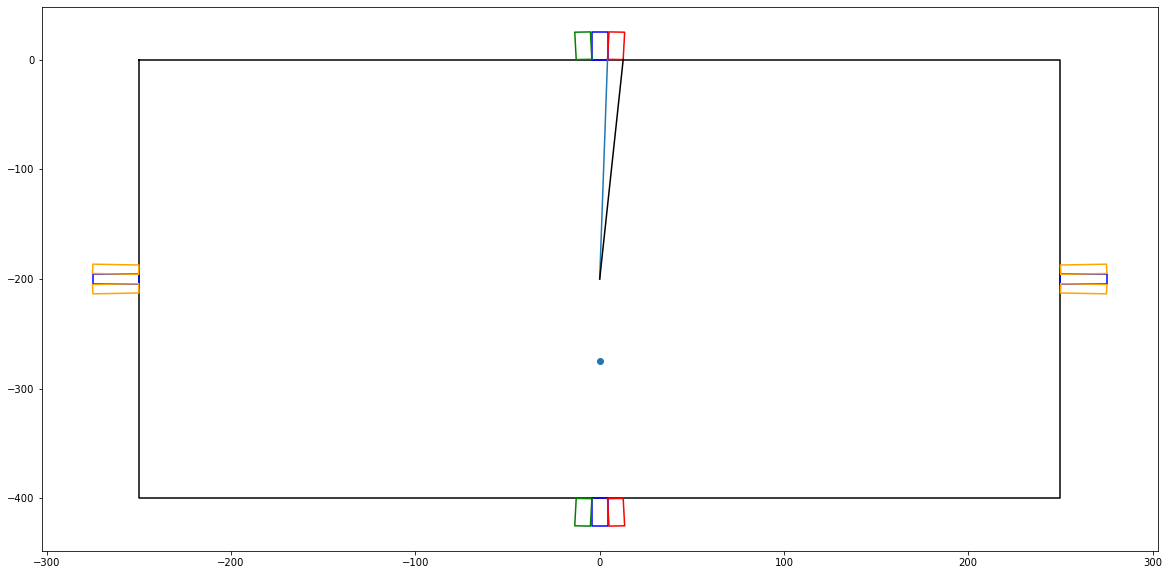

In [1453]:
plt.figure(figsize=(20,10))

plt.scatter(0,k)
lead_glass_posz = []
lead_glass_corner = []
lead_glass_xy = []

offset = 0.25 #0.25/10 #cm

a = 4 + offset
b = 12.5

h = -a
k = -275

#### drawing the square box in the figure 
rectangleX0 = [-250,250,250,-250,-250]
rectangleY0 = [0,0,-400,-400,0]
plt.plot(rectangleX0, rectangleY0, '-',color = "black")

#### 1. drawing the center lead glass block
rectangleX0 = np.array([-a,-a,a,a,-a])
rectangleY0 = np.array([0,2*b,2*b,0,0])
plt.plot(rectangleX0, rectangleY0, '-',color='blue')
plt.plot(rectangleX0, -rectangleY0-400, '-',color='blue')

rectangleX = np.array([-250,-250,-250-2*b,-250-2*b,-250])
rectangleY = np.array([-200-a,-200+a,-200+a,-200-a,-200-a])
plt.plot(rectangleX, rectangleY, '-',color='blue')
plt.plot(-rectangleX, rectangleY, '-',color='blue')

lead_glass_xy.append([-a,0,a,0,-a,2*b,a,2*b])

x1,y1 = -a,0
x2,y2 = a,0
X1 = np.array([[-a],[y1-k],[x1]])
X2 = np.array(([-a],[y2-k],[x2]))
unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle_ = np.arccos(dot_product)
lead_glass_corner.append(angle_)
lead_glass_posz.append([0,b,0])

####### start placing the other lead glass blocks 
############# 2. for the first tilted box
x2,y1 = fsolve(equations_first,(1,1))
x1 =0; y2=0
h = h-x2
theta = math.asin(y1/(2*a))
x1 = x1+a
x2=x2+a
x3 = x1+2*b*math.sin(theta)
x4 = x2+2*b*math.sin(theta)
y3 = y1+2*b*math.cos(theta)
y4 = y2+2*b*math.cos(theta)

lead_glass_xy.append([x1,y1,x2,y2,x3,y3,x4,y4])

X1 = np.array([[-a],[y1-k],[x1]])
X2 = np.array(([-a],[y2-k],[x2]))
unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
dot_product = np.dot(unit_vector_1, unit_vector_2)
angle_ = np.arccos(dot_product)
lead_glass_corner.append(angle_)


rectangleX = np.array([x1,x3,x4,x2,x1])
rectangleY = np.array([y1,y3,y4,y2,y1])
plt.plot(rectangleX, rectangleY, '-',color='red')
plt.plot(-rectangleX, rectangleY, '-',color='green')
plt.plot(rectangleX, -rectangleY-400, '-',color='red')
plt.plot(-rectangleX, -rectangleY-400, '-',color='green')
plt.plot([x1,0],[y1,-200])
plt.plot([x2,0],[y2,-200],color = 'black')

x1_left,y1_left = (rotate([0,-200],[x1,y1],math.pi/2))
x2_left,y2_left = (rotate([0,-200],[x2,y2],math.pi/2))
x3_left,y3_left = (rotate([0,-200],[x3,y3],math.pi/2))
x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))
rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])-50
rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
plt.plot(rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, rectangleY, '-',color='orange')
plt.plot(-rectangleX, -rectangleY-400, '-',color='orange')
plt.plot(rectangleX, -rectangleY-400, '-',color='orange')
    

x_shift = x2
m = (y4-y2)/(x4-x2)
xc,yc = (x1 + x4)/2, (y4+y1)/2
#print(xc,yc,theta/math.pi*180)
lead_glass_posz.append([xc,yc,theta/math.pi*180])

##########################
#for the second block
for i in range(30):
    x1,x2,y1 = fsolve(equation_,(1,1.1,1))
    y2=0
    h = h-x2
    theta = math.asin(y1/(2*a))
    x1 = x1+x_shift; x2=x2+x_shift;
    x3 = x1+2*b*math.sin(theta)
    x4 = x2+2*b*math.sin(theta)
    y3 = y1+2*b*math.cos(theta)
    y4 = y2+2*b*math.cos(theta)
    
    lead_glass_xy.append([x1,y1,x2,y2,x3,y3,x4,y4])
    
    rectangleX = np.array([x1,x3,x4,x2,x1])
    rectangleY = np.array([y1,y3,y4,y2,y1])
    
    X1 = np.array([[-a],[y1-k],[x1]])
    X2 = np.array(([-a],[y2-k],[x2]))
    unit_vector_1 = np.array([X1[2][0],X1[1][0]]) / np.linalg.norm([X1[2][0],X1[1][0]])
    unit_vector_2 = np.array([X2[2][0],X2[1][0]]) / np.linalg.norm([X2[2][0],X2[1][0]])
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle_ = np.arccos(dot_product)
    lead_glass_corner.append(angle_)
    
    
    ##### plot the two sides
    x1_left,y1_left = (rotate([0,-200],[x1,y1],math.pi/2))
    x2_left,y2_left = (rotate([0,-200],[x2,y2],math.pi/2))
    x3_left,y3_left = (rotate([0,-200],[x3,y3],math.pi/2))
    x4_left,y4_left = (rotate([0,-200],[x4,y4],math.pi/2))

    x1_right,y1_right = (rotate([0,-200],[x1,y1],math.radians(math.pi/2)))
    x2_right,y2_right = (rotate([0,-200],[x2,y2],math.radians(math.pi/2)))
    x3_right,y3_right = (rotate([0,-200],[x3,y3],math.radians(math.pi/2)))
    x4_right,y4_right = (rotate([0,-200],[x4,y4],math.radians(math.pi/2)))

    rectangleX = np.array([x1_left,x3_left,x4_left,x2_left,x1_left])-50
    rectangleY = np.array([y1_left,y3_left,y4_left,y2_left,y1_left])
    
    x_shift = x2
    m = (y4-y2)/(x4-x2)
    xc,yc = (x1 + x4)/2, (y4+y1)/2
    #print(xc,yc,theta/math.pi*180)
    lead_glass_posz.append([xc,yc,theta/math.pi*180])

#plt.axis('equal')
#plt.show()

df_z = pd.DataFrame(lead_glass_posz)

pos_z = []

#### drawing the square box in the figure 
rectangleX0 = [-200,200,200,-200,-200]
rectangleY0 = [0,0,-400,-400,0]

a = 4 
x1,y1,x2,y2,x3,y3,x4,y4 = [-a,0,a,0,-a,2*b,a,2*b]
xc,yc,zc = (x1+x4)/2,(y1+y4)/2,0
#print(xc,yc,zc)
#construct the bottom 4 corners and center 
X1_ = np.array([[-a],[y1-k],[x1]])
X2_ = np.array(([-a],[y2-k],[x2]))
X3_ = np.array(([a],[y1-k],[x1]))
X4_ = np.array(([a],[y2-k],[x2]))
Xc_ = np.array([[zc],[yc-k],[xc]])    
Xc_vec = np.array(Xc_).ravel()
pos_z.append([Xc_vec[0],Xc_vec[1],Xc_vec[2],0,0,0])

for i in range(25): #26 #along the z axis     len(lead_glass_posz)
    
    angle = lead_glass_corner[i]
    X1_ = Rx(angle)*X1_
    X2_ = Rx(angle)*X2_
    X3_ = Rx(angle)*X3_
    X4_ = Rx(angle)*X4_
    Xc_ = Rx(angle)*Xc_
    
    Xc_vec = np.array(Xc_).ravel()
    
    
    v1 = np.array(X1_).ravel() - np.array(X2_).ravel()
    v2 = np.array(X3_).ravel() - np.array(X2_).ravel()
    cp = np.cross(v2, v1)
    cp = cp/np.sqrt(sum(cp**2))

    cp_prime = np.array([cp[0],cp[1],cp[2]])
    cp_prime = cp_prime/np.sqrt(sum(cp_prime**2))
    #cp_prime[2] = 0 
    
    y_shift = min(X1_[1],X2_[1],X3_[1],X4_[1])
    shift_vec = np.array((-k-y_shift)*cp_prime/cp_prime[1])
    Xc_vec = np.array(Xc_).ravel()+shift_vec[0]
    X1_vec = np.array(X1_).ravel()+shift_vec[0]
    X2_vec = np.array(X2_).ravel()+shift_vec[0]
    X3_vec = np.array(X3_).ravel()+shift_vec[0]
    X4_vec = np.array(X4_).ravel()+shift_vec[0]
    
    X1_ = np.array([[X1_vec[0]],[X1_vec[1]],[X1_vec[2]]])
    X2_ = np.array(([X2_vec[0]],[X2_vec[1]],[X2_vec[2]]))
    X3_ = np.array(([X3_vec[0]],[X3_vec[1]],[X3_vec[2]]))
    X4_ = np.array(([X4_vec[0]],[X4_vec[1]],[X4_vec[2]]))
    Xc_ = np.array([[Xc_vec[0]],[Xc_vec[1]],[Xc_vec[2]]])
    
    pos_z.append([Xc_vec[0],Xc_vec[1],Xc_vec[2],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))]) # rotation in z always zero for this 
    
    #print(" == Z block Position ", [Xc_vec[0],Xc_vec[1],Xc_vec[2]],90-angle_vec(cp,np.array([0,0,1])),90-angle_vec(cp,np.array([0,0,1])))#lead_glass_posz[i+1][2],lead_glass_posz[0][2])
    
    # prepare for the x direction blocks
    
    X1_x = X1_
    X2_x = X2_
    X3_x = X3_
    X4_x = X4_
    Xc_x = Xc_
        
    av1 = (X1_vec+X2_vec)/2
    av2 = (X3_vec+X4_vec)/2
    unit_vector_1 = np.array(av1) / np.linalg.norm(av1)
    unit_vector_2 = np.array(av2) / np.linalg.norm(av2)
    dot_product = np.dot(unit_vector_1, unit_vector_2)
    angle_ = np.arccos(dot_product)

pos = []
pos_x = []

#### drawing the square box in the figure 
rectangleX0 = [-200,200,200,-200,-200]
rectangleY0 = [0,0,-400,-400,0]

a = 4 
x1,y1,x2,y2,x3,y3,x4,y4 = [-a,0,a,0,-a,2*b,a,2*b]
xc,yc,zc = (x1+x4)/2,(y1+y4)/2,0
#print(xc,yc,zc)
#construct the bottom 4 corners and center 
X1_ = np.array([[-a],[y1-k],[x1]])
X2_ = np.array(([-a],[y2-k],[x2]))
X3_ = np.array(([a],[y1-k],[x1]))
X4_ = np.array(([a],[y2-k],[x2]))
Xc_ = np.array([[zc],[yc-k],[xc]])    
Xc_vec = np.array(Xc_).ravel()
pos.append([Xc_vec[0],Xc_vec[1]-222,Xc_vec[2],0,0,0])
pos_x.append([Xc_vec[0],Xc_vec[1]-222,Xc_vec[2],0,0,0])

for i in range(22): 
    
    angle = lead_glass_corner[i]
    X1_ = Rx(angle)*X1_
    X2_ = Rx(angle)*X2_
    X3_ = Rx(angle)*X3_
    X4_ = Rx(angle)*X4_
    Xc_ = Rx(angle)*Xc_
    
    Xc_vec = np.array(Xc_).ravel()
    
    
    v1 = np.array(X1_).ravel() - np.array(X2_).ravel()
    v2 = np.array(X3_).ravel() - np.array(X2_).ravel()
    cp = np.cross(v2, v1)
    cp = cp/np.sqrt(sum(cp**2))
            
    cp_prime = np.array([cp[0],cp[1],cp[2]])
    cp_prime = cp_prime/np.sqrt(sum(cp_prime**2))
    #cp_prime[2] = 0 
    
    y_shift = min(X1_[1],X2_[1],X3_[1],X4_[1])
    shift_vec = np.array((-k-y_shift)*cp_prime/cp_prime[1])
    Xc_vec = np.array(Xc_).ravel()+shift_vec[0]
    X1_vec = np.array(X1_).ravel()+shift_vec[0]
    X2_vec = np.array(X2_).ravel()+shift_vec[0]
    X3_vec = np.array(X3_).ravel()+shift_vec[0]
    X4_vec = np.array(X4_).ravel()+shift_vec[0]
    
    X1_ = np.array([[X1_vec[0]],[X1_vec[1]],[X1_vec[2]]])
    X2_ = np.array(([X2_vec[0]],[X2_vec[1]],[X2_vec[2]]))
    X3_ = np.array(([X3_vec[0]],[X3_vec[1]],[X3_vec[2]]))
    X4_ = np.array(([X4_vec[0]],[X4_vec[1]],[X4_vec[2]]))
    Xc_ = np.array([[Xc_vec[0]],[Xc_vec[1]],[Xc_vec[2]]])
    
    pos.append([Xc_vec[2],Xc_vec[1]-222,Xc_vec[0],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))]) # rotation in z always zero for this 
    pos_x.append([Xc_vec[2],Xc_vec[1]-222,Xc_vec[0],90-angle_vec(cp,np.array([0,0,1])),0,90-angle_vec(cp,np.array([1,0,0]))])
    #print(i+2, " th block: " , [Xc_vec[2],Xc_vec[1]-222,Xc_vec[0]]," X angle: ", 90-angle_vec(cp,np.array([0,0,1])), " Z angle: ",90-angle_vec(cp,np.array([1,0,0])))
    #print(X4_vec)

all_pos = []
#all_pos_fb = []

for i in range(23): #[10:-1]:#len(pos_x) # for each element in a row in Z axis
    
    pos_x_dir = np.array(pos_x[i])
    #all_pos.append([pos_x_dir[0],pos_x_dir[1]-53,pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],pos_x_dir[3]])
    
    if i > 11:
        all_pos.append([pos_x_dir[0],pos_x_dir[1]-53,pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],pos_x_dir[3]])
        all_pos.append([-pos_x_dir[0],pos_x_dir[1]-53,pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],-pos_x_dir[3]])
        #all_pos.append([-pos_x_dir[0],pos_x_dir[1]-53,-pos_x_dir[2],-pos_x_dir[5],pos_x_dir[4],-pos_x_dir[3]])
        
    #print([pos_x_dir[0],pos_x_dir[1]-53,pos_x_dir[2],pos_x_dir[5],pos_x_dir[4],pos_x_dir[3]])
        
    for j in range(23): #len(pos)-1
        pos_z_dir0 =np.array(lead_glass_posz[0][0:2]) 
        pos_z_dir = np.array(lead_glass_posz[j+1][0:2])
        z_angle = lead_glass_posz[j+1][2]
        
        shift = np.array([pos_z_dir[0],pos_z_dir[1]])-pos_z_dir0 #z shift,y_shift
        
        center = pos_x_dir[0:3]+np.array([0,shift[1],shift[0]])
        
        if i<12:
            if j>10:
                all_pos.append([center[0],center[1]-53,center[2],z_angle,0,pos_x[i][3]])
                all_pos.append([center[0],center[1]-53,-center[2],-z_angle,0,pos_x[i][3]])
                all_pos.append([-center[0],center[1]-53,center[2],z_angle,0,-pos_x[i][3]])
                all_pos.append([-center[0],center[1]-53,-center[2],-z_angle,0,-pos_x[i][3]])
        else:
            all_pos.append([center[0],center[1]-53,center[2],z_angle,0,pos_x[i][3]])
            all_pos.append([center[0],center[1]-53,-center[2],-z_angle,0,pos_x[i][3]])
            all_pos.append([-center[0],center[1]-53,center[2],z_angle,0,-pos_x[i][3]])
            all_pos.append([-center[0],center[1]-53,-center[2],-z_angle,0,-pos_x[i][3]])
        
pd.DataFrame(all_pos).to_csv("./lead_glass_position/non_axial_fb.csv",index=False,header=False)